# WARNING: Exploratory Use Only!!!

In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

WORKDIR = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm'
os.chdir(WORKDIR)

# Work-in-Progress

* Storage format for the kinship similarity matrix
* Output from the kinship-similarity-matrix widget
* Tranching strategy for using rna concordance in multiomics


# Input RNA Genotype Data

Robert gave me this list of bed files to use for comparison with the freeze.10 wgs genotypes

```/proj/regeps/regep00/studies/COPDGene/analyses/rerpc/rnaseqTaffeta/```
* ```grch38withSJDB_2pass_chimeric_junctions/*/qc/*.bed```
* ```grc38withSJDB_2pass/*/qc/*.bed```


# Concordance data was generated per-batch using the "Widget"

* https://changit.bwh.harvard.edu/rejpz/KING/tree/development

In [7]:
batch_king_results = glob.glob('tmp/batch_*_king.csv')
print(f'{len(batch_king_results)} Batches Total')
for file in batch_king_results[0:5]:
    print(f'* {file}')

78 Batches Total
* tmp/batch_78_190731_NB551475_0143_AHMKK2BGXB_king.csv
* tmp/batch_53_190402_NB551475_0076_AHCCLHBGXB_king.csv
* tmp/batch_67_190522_D00281_0057_BCDMJFANXX_king.csv
* tmp/batch_64_190502_D00281_0053_BCD1NDANXX_king.csv
* tmp/batch_66_190515_D00281_0055_BCDN78ANXX_king.csv


All of the files have similar line counts, but not exact (58498337 is repeated often)
```
glob.glob('tmp/batch_*.csv'):
os.system(f'wc -l {file}')
58034152 tmp/batch_78_190731_NB551475_0143_AHMKK2BGXB_king.csv
58844977 tmp/batch_53_190402_NB551475_0076_AHCCLHBGXB_king.csv
58498337 tmp/batch_67_190522_D00281_0057_BCDMJFANXX_king.csv
58498337 tmp/batch_64_190502_D00281_0053_BCD1NDANXX_king.csv
58498337 tmp/batch_66_190515_D00281_0055_BCDN78ANXX_king.csv
58498337 tmp/batch_40_180214_7001411_0650_BCBV7RANXX_king.csv
58066477 tmp/batch_77_190725_NB551475_0142_AHM2KGBGXB_king.csv
```

# Primary source of the two humps is rna/wgs vs wgs/wgs comparisons

I think

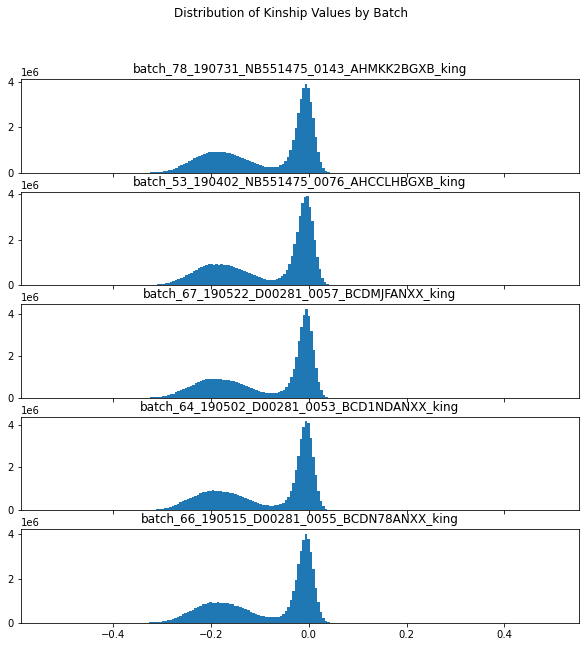

In [3]:
fig, axs = plt.subplots(len(batch_king_results[0:5]), sharex=True, figsize=(10, 10))
fig.suptitle('Distribution of Kinship Values by Batch')
for (h, batch_file) in enumerate(batch_king_results[0:5]):
    batch = batch_file.split('/')[-1].split('.')[0]
    df = pd.read_csv(batch_file)
    axs[h].hist(df['Kinship'], bins=200)
    axs[h].set_title(batch)
#plt.savefig('images/rna_king_kinship_by_batch.png')

In [4]:

#batch_12 = pd.read_csv('tmp/batch_12_170209_7001411_0477_ACA366ANXX_king.csv')
#plt.hist(batch_12['Kinship'], bins=50)

#batch_54 = pd.read_csv('tmp/batch_54_190403_NB551475_0077_AHN2FVBGX9_king.csv')
#plt.hist(batch_54['Kinship'], bins=50)


In [5]:
# batch = pd.read_csv('tmp/batch_38_180131_7001411_0639_ACBVCUANXX_king.csv')
# plt.hist(batch['Kinship'], bins=50)


In [2]:
# batch = pd.read_csv('tmp/batch_21_170508_7001411_0506_BCAPPAANXX_king.csv')
# batch

In [ ]:

##batch_mtx = batch.pivot(columns='IID_orig_y')
## batch_mtx
## The pivot failed with "Unable to allocate 589. GiB for an array with shape (632718002176,) and data type bool"
sample_ids = pd.concat([batch.IID_orig_x, batch.IID_orig_y]).unique()
sample_ids.size

In [15]:
#df = pd.DataFrame(index=sample_ids, columns=sample_ids)
#df

In [ ]:
#def consume_row(row):
#    df.loc[row.IID_orig_x, row.IID_orig_y] = row.Kinship
#
#annotated = batch.apply(consume_row, axis=1)
#annotated


In [11]:
#for (r, row) in batch.iterrows():
#    df.loc[row.IID_orig_x, row.IID_orig_y] = row.Kinship

In [ ]:
# df

In [ ]:
# df.to_csv('tmp/batch.matrix.csv')

In [4]:
batch_multi_idx = pd.read_csv('tmp/batch_21_170508_7001411_0506_BCAPPAANXX_king.csv', index_col=['IID_orig_x', 'IID_orig_y'],
                            usecols=['IID_orig_x', 'IID_orig_y', 'Kinship'])
batch_multi_idx.sort_index(level=[0,1], inplace=True)
batch_multi_idx

Kinship
IID_orig_x                                         IID_orig_y                                                 
NWD100018                                          NWD100059                                            0.0140
                                                   NWD100095                                           -0.2394
                                                   NWD100109                                           -0.0052
                                                   NWD100230                                            0.0005
                                                   NWD100295                                           -0.0977
...                                                                                                        ...
S-001571052_CTGAAGCT-ATAGAGGC_L007_accepted_hit... S-001572806_TAATGCGC-CAGGACGT_L008_accepted_hit...   0.1093
                                                   S-001572808_TAATGCGC-GTACTGAC_L008_accepted_hit...   0.0580
S-001571053_CTGAAGCT-CCTATCCT_L007_accepted_hit... S-001572806_TAATGCGC-CAGGACGT_L008_accepted_hit...   0.0909
                                                   S-001572808_TAATGCGC-GTACTGAC_L008_accepted_hit...   0.0592
S-001572806_TAATGCGC-CAGGACGT_L008_accepted_hit... S-001572808_TAATGCGC-GTACTGAC_L008_accepted_hit...   0.1156

[58498336 rows x 1 columns]

In [5]:
batch_matrix = batch_multi_idx.unstack(level=-1)
batch_matrix

Kinship            \
IID_orig_y                                         NWD100059 NWD100095   
IID_orig_x                                                               
NWD100018                                              0.014   -0.2394   
NWD100059                                                NaN   -0.2366   
NWD100095                                                NaN       NaN   
NWD100109                                                NaN       NaN   
NWD100230                                                NaN       NaN   
...                                                      ...       ...   
S-001571050_GAATTCGT-GTACTGAC_L006_accepted_hit...       NaN       NaN   
S-001571051_CTGAAGCT-TATAGCCT_L007_accepted_hit...       NaN       NaN   
S-001571052_CTGAAGCT-ATAGAGGC_L007_accepted_hit...       NaN       NaN   
S-001571053_CTGAAGCT-CCTATCCT_L007_accepted_hit...       NaN       NaN   
S-001572806_TAATGCGC-CAGGACGT_L008_accepted_hit...       NaN       NaN   

                                                                        \
IID_orig_y                                         NWD100109 NWD100230   
IID_orig_x                                                               
NWD100018                                            -0.0052    0.0005   
NWD100059                                            -0.0060   -0.0130   
NWD100095                                            -0.2341   -0.2148   
NWD100109                                                NaN   -0.0145   
NWD100230                                                NaN       NaN   
...                                                      ...       ...   
S-001571050_GAATTCGT-GTACTGAC_L006_accepted_hit...       NaN       NaN   
S-001571051_CTGAAGCT-TATAGCCT_L007_accepted_hit...       NaN       NaN   
S-001571052_CTGAAGCT-ATAGAGGC_L007_accepted_hit...       NaN       NaN   
S-001571053_CTGAAGCT-CCTATCCT_L007_accepted_hit...       NaN       NaN   
S-001572806_TAATGCGC-CAGGACGT_L008_accepted_hit...       NaN       NaN   

                                                                        \
IID_orig_y                                         NWD100295 NWD100314   
IID_orig_x                                                               
NWD100018                                            -0.0977    0.0216   
NWD100059                                            -0.0766    0.0149   
NWD100095                                            -0.0322   -0.2368   
NWD100109                                            -0.1130    0.0034   
NWD100230                                            -0.0739    0.0254   
...                                                      ...       ...   
S-001571050_GAATTCGT-GTACTGAC_L006_accepted_hit...       NaN       NaN   
S-001571051_CTGAAGCT-TATAGCCT_L007_accepted_hit...       NaN       NaN   
S-001571052_CTGAAGCT-ATAGAGGC_L007_accepted_hit...       NaN       NaN   
S-001571053_CTGAAGCT-CCTATCCT_L007_accepted_hit...       NaN       NaN   
S-001572806_TAATGCGC-CAGGACGT_L008_accepted_hit...       NaN       NaN   

                                                                        \
IID_orig_y                                         NWD100327 NWD100492   
IID_orig_x                                                               
NWD100018                                            -0.2201   -0.0088   
NWD100059                                            -0.2054    0.0100   
NWD100095                                             0.0286   -0.2410   
NWD100109                                            -0.2014   -0.0144   
NWD100230                                            -0.1962    0.0007   
...                                                      ...       ...   
S-001571050_GAATTCGT-GTACTGAC_L006_accepted_hit...       NaN       NaN   
S-001571051_CTGAAGCT-TATAGCCT_L007_accepted_hit...       NaN       NaN   
S-001571052_CTGAAGCT-ATAGAGGC_L007_accepted_hit...       NaN       NaN   
S-001571053_CTGAAGCT-CCTATCCT_L007_accepted_hit...    

In [7]:
# This file is 1.9GB compared to 2.7GB for the multi-index file
# Down to 487MB with only the Kinship values
batch_matrix.to_csv('tmp/unstacked.csv')

In [13]:
## The pivot failed with "Unable to allocate 589. GiB for an array with shape (632718002176,) and data type bool"
sample_ids = batch_matrix.index
sample_ids.size

10816

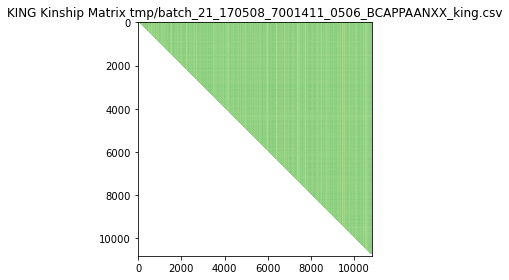

In [10]:
### Draw a heatmap of the concordance matrix
import numpy as np

fig, ax = plt.subplots()
im = ax.imshow(batch_matrix, cmap="YlGn")

# Show all ticks and label them with the respective list entries
# ax.set_xticks(np.arange(sample_ids.size), labels=sample_ids)
# ax.set_yticks(np.arange(sample_ids.size), labels=sample_ids)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in sample_ids:
#    for j in sample_ids:
#        text = ax.text(j, i, batch_matrix.loc[i, j].value, ha="center", va="center", color="w")

ax.set_title("KING Kinship Matrix tmp/batch_21_170508_7001411_0506_BCAPPAANXX_king.csv")
fig.tight_layout()
plt.show()


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.5344  , -0.513712, -0.493024, -0.472336, -0.451648, -0.43096 ,
        -0.410272, -0.389584, -0.368896, -0.348208, -0.32752 , -0.306832,
        -0.286144, -0.265456, -0.244768, -0.22408 , -0.203392, -0.182704,
        -0.162016, -0.141328, -0.12064 , -0.099952, -0.079264, -0.058576,
        -0.037888, -0.0172  ,  0.003488,  0.024176,  0.044864,  0.065552,
         0.08624 ,  0.106928,  0.127616,  0.148304,  0.168992,  0.18968 ,
         0.210368,  0.231056,  0.251744,  0.272432,  0.29312 ,  0.313808,
         0.334496,  0.355184,  0.375872,  0.39656 ,  0.417248,  0.437936,
         0.458624,  0.479312,  0.5     ]),
 <a list of 10816 BarContainer objects>)

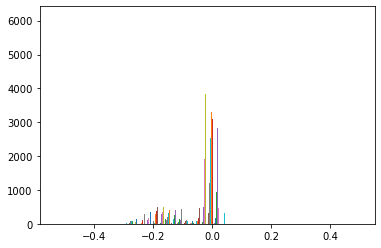

In [12]:
plt.hist(batch_matrix['Kinship'], bins=50)

In [66]:
# plt.hist(batch_12[batch_12.Kinship > 0.15]['Kinship'], bins=50)


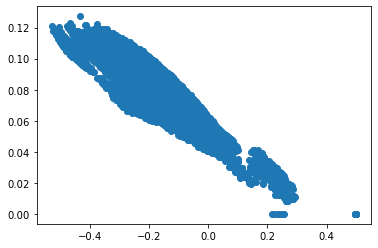

In [14]:
batch_47 = pd.read_csv('tmp/batch_47_180725_7001411_0748_BCCEC4ANXX_king.csv')
plt.scatter(batch_47.Kinship, batch_47.IBS0)

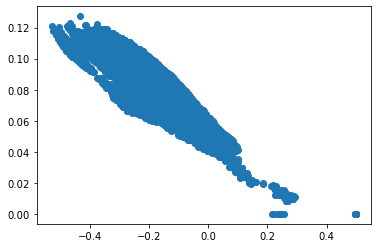

In [18]:
batch_47_nwd_pairs = batch_47[batch_47.IID_orig_x.str.startswith('NWD') & batch_47.IID_orig_y.str.startswith('NWD')]
plt.scatter(batch_47_nwd_pairs.Kinship, batch_47_nwd_pairs.IBS0)

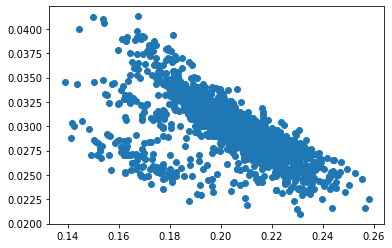

In [20]:
batch_47_s_pairs = batch_47[~batch_47.IID_orig_x.str.startswith('NWD') & ~batch_47.IID_orig_y.str.startswith('NWD')]
plt.scatter(batch_47_s_pairs.Kinship, batch_47_s_pairs.IBS0)

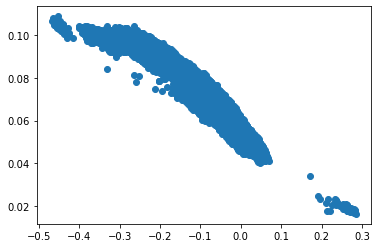

In [21]:
batch_47_cross_pairs = batch_47[(batch_47.IID_orig_x.str.startswith('NWD') & ~batch_47.IID_orig_y.str.startswith('NWD')) |
                                (~batch_47.IID_orig_x.str.startswith('NWD') & batch_47.IID_orig_y.str.startswith('NWD'))]
plt.scatter(batch_47_cross_pairs.Kinship, batch_47_cross_pairs.IBS0)

In [34]:
all_c_data = pd.read_csv('tmp/GECOPD/4.concordance_data', index_col=[0,1])
all_c_data = all_c_data.sort_index()
all_c_data


Concord
ID1                                                ID2                                                        
NWD100295                                          S-001643536_accepted_hits.sorted.bam                 0.2626
NWD100651                                          S-001612094_CGGCTATG-GGCTCTGA_L005_accepted_hit...   0.2670
NWD100652                                          S-001593553_TCCGCGAA-TATAGCCT_L006_accepted_hit...   0.2783
NWD100973                                          S-001613791_AGCGATAG-ATAGAGGC_L004_accepted_hit...   0.2695
NWD101059                                          S-001550549_CGCTCATT-TAATCTTA_L007_accepted_hit...   0.2705
...                                                                                                        ...
S-001648322_GGACTTGG-CGCAGACG_L001_accepted_hit... S-001642859_CGGAACTG-CACTACGA_L008_accepted_hit...   0.2659
                                                   S-001643080_ACCTTGGC-GGCCTCAT_L006_accepted_hit...   0.2635
                                                   S-001648024_AACGTTCC-GGAGTACT_L003_accepted_hit...   0.2686
                                                   S-001648027_GGCTTAAG-TCGTGACC_L002_accepted_hit...   0.2669
                                                   S-001648029_CGGCGTGA-GCGCCTGT_L003_accepted_hit...   0.2678

[29668 rows x 1 columns]

In [ ]:
cross_dataset_matches = []
for (h, batch_file) in enumerate(batch_king_results):
    df = pd.read_csv(batch_file)
    cross_pairs = df[(df.IID_orig_x.str.startswith('NWD') & ~df.IID_orig_y.str.startswith('NWD')) |
                     (~df.IID_orig_x.str.startswith('NWD') & df.IID_orig_y.str.startswith('NWD'))]
    cross_dataset_matches.append(cross_pairs)
all_cross_matches = pd.concat(cross_dataset_matches)
all_cross_matches

----

# 23-Nov-2021

In [52]:
### This takes about 2 minutes ... this is all of the S-ID vs NWD-ID results from
### the rna king run (4722 samples)
rna_wgs_comps = pd.read_csv('tmp/GECOPD_rna_wgs_king_results.csv')
rna_wgs_comps

,IID_orig_x,IID_orig_y,N_SNP,HetHet,IBS0,Kinship
0,NWD100018,S-001615425_S14_L002_accepted_hits.sorted.bam,8935,0.1294,0.0575,0.0168
1,NWD100059,S-001615425_S14_L002_accepted_hits.sorted.bam,8966,0.1273,0.0577,0.0090
2,NWD100095,S-001615425_S14_L002_accepted_hits.sorted.bam,8966,0.1145,0.0781,-0.1072
3,NWD100109,S-001615425_S14_L002_accepted_hits.sorted.bam,8966,0.1278,0.0613,-0.0100
4,NWD100230,S-001615425_S14_L002_accepted_hits.sorted.bam,8966,0.1314,0.0574,0.0251
...,...,...,...,...,...,...
67270763,NWD999840,S-001554170_RR_ATTACTCG-GTACTGAC_L002_accepted...,7497,0.1215,0.0599,-0.0144
67270764,NWD999849,S-001554170_RR_ATTACTCG-GTACTGAC_L002_accepted...,7497,0.1150,0.0664,-0.0337
67270765,NWD999930,S-001554170_RR_ATTACTCG-GTACTGAC_L002_accepted...,7497,0.1166,0.0695,-0.0388
67270766,NWD999969,S-001554170_RR_ATTACTCG-GTACTGAC_L002_accepted...,7497,0.1204,0.0751,-0.0604


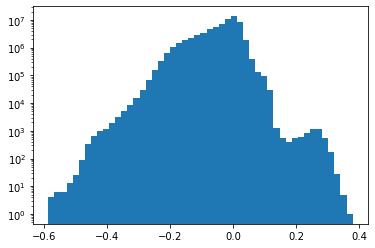

In [67]:
plt.hist(rna_wgs_comps['Kinship'], bins=50)
plt.yscale('log')

In [14]:
rna_wgs_comps[rna_wgs_comps.Kinship > 0.13]

,IID_orig_x,IID_orig_y,N_SNP,HetHet,IBS0,Kinship
6471,NWD638959,S-001615425_S14_L002_accepted_hits.sorted.bam,8966,0.1777,0.0296,0.1810
16022,NWD539474,S-001615392_S20_L002_accepted_hits.sorted.bam,8966,0.1679,0.0297,0.1704
24153,NWD319002,S-001615144_S12_L002_accepted_hits.sorted.bam,8966,0.1741,0.0319,0.1652
41292,NWD854854,S-001615385_S11_L001_accepted_hits.sorted.bam,8963,0.1930,0.0278,0.2013
44007,NWD182690,S-001613482_S23_L001_accepted_hits.sorted.bam,8966,0.1797,0.0313,0.1740
...,...,...,...,...,...,...
67239979,NWD222185,S-001554168_RR_TCCGGAGA-TATAGCCT_L002_accepted...,7497,0.2256,0.0168,0.2890
67240735,NWD284784,S-001554168_RR_TCCGGAGA-TATAGCCT_L002_accepted...,7497,0.2256,0.0168,0.2890
67247038,NWD810879,S-001554168_RR_TCCGGAGA-TATAGCCT_L002_accepted...,7497,0.2256,0.0168,0.2890
67251083,NWD249669,S-001554170_RR_ATTACTCG-GTACTGAC_L001_accepted...,7333,0.2136,0.0200,0.2649


In [55]:
grouped = rna_wgs_comps.groupby('IID_orig_y')
grouped

In [56]:
grouped.size()

IID_orig_y
S-001177272_TCCGCGAA-GTACTGAC_L005_accepted_hits.sorted.bam    10753
S-001177736_AGCGATAG-GTACTGAC_L008_accepted_hits.sorted.bam    10753
S-001178531_TCTCGCGC-TATAGCCT_L006_accepted_hits.sorted.bam    10753
S-001178548_TCTCGCGC-ATAGAGGC_L006_accepted_hits.sorted.bam    10753
S-001178707_TCTCGCGC-CCTATCCT_L006_accepted_hits.sorted.bam    10753
                                                               ...  
S-001648320_CCAAGTCT-AAGGATGA_L002_accepted_hits.sorted.bam    10753
S-001648321_TGGATCGA-GTGCGATA_L001_accepted_hits.sorted.bam    10753
S-001648322_GGACTTGG-CGCAGACG_L001_accepted_hits.sorted.bam    10753
S-001648323_TTGGACTC-GGAAGCAG_L002_accepted_hits.sorted.bam    10753
S-001648324_CTCTCGTC-TATAACCT_L002_accepted_hits.sorted.bam    10753
Length: 4722, dtype: int64

In [39]:
# fig, ax = plt.subplots(figsize=(15,7))
# grouped['Kinship'].plot(ax=ax)

In [57]:
grouped['Kinship']

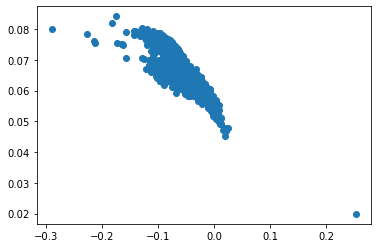

In [59]:
plt.scatter(x=grouped.get_group('S-001177272_TCCGCGAA-GTACTGAC_L005_accepted_hits.sorted.bam')['Kinship'], 
            y=grouped.get_group('S-001177272_TCCGCGAA-GTACTGAC_L005_accepted_hits.sorted.bam')['IBS0'])

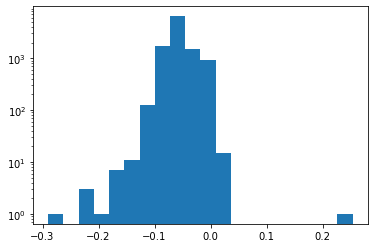

In [63]:
plt.hist(grouped.get_group('S-001177272_TCCGCGAA-GTACTGAC_L005_accepted_hits.sorted.bam')['Kinship'], bins=20)
plt.yscale('log')

In [ ]:
fig = plt.figure()
ax_origin = None
plot_index = 1
axes = []
n_samples = len(grouped)
for (rna_sample, group) in grouped:
    if not ax_origin:
        ax = ax_origin = fig.add_subplot(n_samples, 1, plot_index)
    else:
        ax_origin = fig.add_subplot(n_samples, 1, plot_index, sharex=ax_origin)
    ax.hist(group['Kinship'], bins=20)
    ax.yscale('log')
    ax.axhline(c='grey', alpha=0.5)
    plt.setp(ax.get_xticklabels(), visible=False)
    plot_index += 1

plt.tight_layout()

In [22]:
best_match = grouped.max()
best_match.reset_index()
best_match

,IID_orig_x,Kinship
IID_orig_y,,
S-001177272_TCCGCGAA-GTACTGAC_L005_accepted_hits.sorted.bam,NWD999984,0.2536
S-001177736_AGCGATAG-GTACTGAC_L008_accepted_hits.sorted.bam,NWD999984,0.2435
S-001178531_TCTCGCGC-TATAGCCT_L006_accepted_hits.sorted.bam,NWD999984,0.2652
S-001178548_TCTCGCGC-ATAGAGGC_L006_accepted_hits.sorted.bam,NWD999984,0.2562
S-001178707_TCTCGCGC-CCTATCCT_L006_accepted_hits.sorted.bam,NWD999984,0.2733
...,...,...
S-001648320_CCAAGTCT-AAGGATGA_L002_accepted_hits.sorted.bam,NWD999984,0.2213
S-001648321_TGGATCGA-GTGCGATA_L001_accepted_hits.sorted.bam,NWD999984,0.2502
S-001648322_GGACTTGG-CGCAGACG_L001_accepted_hits.sorted.bam,NWD999984,0.2288


In [ ]:
### Let's take the concordance values from *one* sample and split them by quartile:
### (<0.25*max,0.25-0.5*max,0.5-0.75*max,>0.75max)
max_concordance = rna_wgs_comps.groupby('IID_orig_y')['Kinship'].max()
max_concordance

In [ ]:
grouped = rna_wgs_comps.groupby('IID_orig_y')

----

# Tranching Approach

This is similar to what was done in the original rnaseq_snp_concordance pipeline

In [3]:
### Take one batch, filter for wgs/rna, group by sample, find max and quartiles
batch = pd.read_csv('tmp/batch_35_171229_7001411_0617_ACBV7MANXX_king.csv', usecols=['IID_orig_x', 'IID_orig_y', 'Kinship'])
batch


,IID_orig_x,IID_orig_y,Kinship
0,NWD100018,NWD100059,0.0054
1,NWD100018,NWD100095,-0.2466
2,NWD100059,NWD100095,-0.2402
3,NWD100018,NWD100109,-0.0091
4,NWD100059,NWD100109,-0.0099
...,...,...,...
58498331,S-001613609_AGCGATAG-CCTATCCT_L008_accepted_hi...,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,0.1745
58498332,S-001613790_AGCGATAG-GGCTCTGA_L008_accepted_hi...,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,0.1402
58498333,S-001614005_AGCGATAG-AGGCGAAG_L008_accepted_hi...,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,0.2137
58498334,S-001614006_AGCGATAG-TAATCTTA_L008_accepted_hi...,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,0.2135


### Filter for only matches between the wgs and the rna

The rules need to be different for the matches between the wgs/wgs and rna/rna

In [4]:
batch_rna_wgs = batch[(batch.IID_orig_x.str.startswith('NWD') & batch.IID_orig_y.str.startswith('S-'))]
batch_rna_wgs

,IID_orig_x,IID_orig_y,Kinship
57808128,NWD100018,S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hi...,-0.0396
57808129,NWD100059,S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hi...,-0.0395
57808130,NWD100095,S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hi...,-0.2368
57808131,NWD100109,S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hi...,-0.0426
57808132,NWD100230,S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hi...,-0.0386
...,...,...,...
58498268,NWD999840,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,0.0062
58498269,NWD999849,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,-0.0151
58498270,NWD999930,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,-0.0199
58498271,NWD999969,S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hi...,-0.0082


In [5]:
kinship_by_sample = batch_rna_wgs.groupby('IID_orig_y')['Kinship']


In [6]:
kinship_by_sample.max()

IID_orig_y
S-001605558_ATTCAGAA-TATAGCCT_L001_accepted_hits.sorted.bam    0.2366
S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hits.sorted.bam    0.2301
S-001606156_ATTCAGAA-CCTATCCT_L001_accepted_hits.sorted.bam    0.2627
S-001606429_ATTCAGAA-GGCTCTGA_L001_accepted_hits.sorted.bam    0.2588
S-001606431_ATTCAGAA-AGGCGAAG_L001_accepted_hits.sorted.bam    0.2557
                                                                ...  
S-001613790_AGCGATAG-GGCTCTGA_L008_accepted_hits.sorted.bam    0.2335
S-001614005_AGCGATAG-AGGCGAAG_L008_accepted_hits.sorted.bam    0.2423
S-001614006_AGCGATAG-TAATCTTA_L008_accepted_hits.sorted.bam    0.0652
S-001614821_AGCGATAG-CAGGACGT_L008_accepted_hits.sorted.bam    0.2351
S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hits.sorted.bam    0.1463
Name: Kinship, Length: 64, dtype: float64

In [8]:
kinship_by_sample.apply(list)

IID_orig_y
S-001605558_ATTCAGAA-TATAGCCT_L001_accepted_hits.sorted.bam    [0.0207, 0.0131, -0.2172, 0.0006, 0.0074, -0.0...
S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hits.sorted.bam    [-0.0396, -0.0395, -0.2368, -0.0426, -0.0386, ...
S-001606156_ATTCAGAA-CCTATCCT_L001_accepted_hits.sorted.bam    [0.0243, 0.0097, -0.2135, -0.0017, 0.0347, -0....
S-001606429_ATTCAGAA-GGCTCTGA_L001_accepted_hits.sorted.bam    [0.0316, 0.0198, -0.1989, 0.0088, 0.0267, -0.0...
S-001606431_ATTCAGAA-AGGCGAAG_L001_accepted_hits.sorted.bam    [0.0134, -0.001, -0.2187, -0.0016, 0.0196, -0....
                                                                                     ...                        
S-001613790_AGCGATAG-GGCTCTGA_L008_accepted_hits.sorted.bam    [-0.0356, -0.0366, -0.2297, -0.036, -0.0463, -...
S-001614005_AGCGATAG-AGGCGAAG_L008_accepted_hits.sorted.bam    [0.0245, 0.0146, -0.2071, 0.0021, 0.039, -0.07...
S-001614006_AGCGATAG-TAATCTTA_L008_accepted_hits.sorted.bam    [0.0373, 0.0224, -0.20

In [19]:
groups_by_sample = batch_rna_wgs.groupby('IID_orig_y')
groups_by_sample

### I think the following demonstrates that the tranching approach will work
* For this sample:```S-001614856_AGCGATAG-GTACTGAC_L008_accepted_hits.sorted.bam 0.1463: 32205-51-0-3```
it even allows the threshhold to be flexed down to 0.14, but still maintain the integraity
of the matching.
* For samples like this: ```S-001610155_CTGAAGCT-AGGCGAAG_L003_accepted_hits.sorted.bam 0.0599: 17421-9102-5118-618```
the max concordance is so low that we should discard based solely on that 

In [23]:
   
for (rna_sample, group) in groups_by_sample:
    max = group['Kinship'].max()
    s25 = max * 0.25
    s50 = max * 0.50
    s75 = max * 0.75
    n0 = group[group.Kinship < s25].size
    n25 = group[(group.Kinship >= s25) & (group.Kinship < s50)].size
    n50 = group[(group.Kinship >= s50) & (group.Kinship < s75)].size
    n75 = group[group.Kinship >= s75].size
    print(f'{rna_sample} {max}: {n0}-{n25}-{n50}-{n75}')
    


S-001605558_ATTCAGAA-TATAGCCT_L001_accepted_hits.sorted.bam 0.2366: 32256-0-0-3
S-001605782_ATTCAGAA-ATAGAGGC_L001_accepted_hits.sorted.bam 0.2301: 32256-0-0-3
S-001606156_ATTCAGAA-CCTATCCT_L001_accepted_hits.sorted.bam 0.2627: 32256-0-0-3
S-001606429_ATTCAGAA-GGCTCTGA_L001_accepted_hits.sorted.bam 0.2588: 32256-0-0-3
S-001606431_ATTCAGAA-AGGCGAAG_L001_accepted_hits.sorted.bam 0.2557: 32256-0-0-3
S-001608411_ATTCAGAA-TAATCTTA_L001_accepted_hits.sorted.bam 0.2547: 32256-0-0-3
S-001608419_ATTCAGAA-CAGGACGT_L001_accepted_hits.sorted.bam 0.2366: 32256-0-0-3
S-001608421_ATTCAGAA-GTACTGAC_L001_accepted_hits.sorted.bam 0.2399: 32256-0-0-3
S-001608428_GAATTCGT-TATAGCCT_L002_accepted_hits.sorted.bam 0.2454: 32256-0-0-3
S-001608843_GAATTCGT-ATAGAGGC_L002_accepted_hits.sorted.bam 0.2298: 32256-0-0-3
S-001608990_GAATTCGT-CCTATCCT_L002_accepted_hits.sorted.bam 0.2467: 32256-0-0-3
S-001609310_GAATTCGT-GGCTCTGA_L002_accepted_hits.sorted.bam 0.2413: 32256-0-0-3
S-001609397_GAATTCGT-AGGCGAAG_L002_accep

### Apply the tranching to all samples

And output the tranch-count-strings to a text file for review, we should be able to eyeball for potentially
problematic samples and/or batches

In [ ]:
with open('tmp/tranch_counts_by_sample.txt', 'w') as fh:
    for batch_file in batch_king_results:
        print(batch_file)
        batch = pd.read_csv(batch_file, usecols=['IID_orig_x', 'IID_orig_y', 'Kinship'])
        batch_rna_wgs = batch[(batch.IID_orig_x.str.startswith('NWD') & batch.IID_orig_y.str.startswith('S-'))]
        groups_by_sample = batch_rna_wgs.groupby('IID_orig_y')
        for (rna_sample, group) in groups_by_sample:
            max = group['Kinship'].max()
            s25 = max * 0.25
            s50 = max * 0.50
            s75 = max * 0.75
            n0 = group[group.Kinship < s25].size
            n25 = group[(group.Kinship >= s25) & (group.Kinship < s50)].size
            n50 = group[(group.Kinship >= s50) & (group.Kinship < s75)].size
            n75 = group[group.Kinship >= s75].size
            fh.write(f'{rna_sample} {max}: {n0}-{n25}-{n50}-{n75}\n')
    


tmp/batch_78_190731_NB551475_0143_AHMKK2BGXB_king.csv
tmp/batch_53_190402_NB551475_0076_AHCCLHBGXB_king.csv
tmp/batch_67_190522_D00281_0057_BCDMJFANXX_king.csv
tmp/batch_64_190502_D00281_0053_BCD1NDANXX_king.csv
tmp/batch_66_190515_D00281_0055_BCDN78ANXX_king.csv
tmp/batch_40_180214_7001411_0650_BCBV7RANXX_king.csv
tmp/batch_77_190725_NB551475_0142_AHM2KGBGXB_king.csv
tmp/batch_adaptertest_170728_7001411_0529_AHN2KCBCXY_king.csv
tmp/batch_71_190607_D00281_0059_BCDRKUANXX_king.csv
tmp/batch_68_190522_D00281_0056_ACDNB8ANXX_king.csv
tmp/batch_51_181017_7001411_0784_ACCF2HANXX_king.csv
tmp/batch_85_191010_7001411_0900_ACDMK1ANXX_king.csv
tmp/batch_30_171103_7001411_0583_ACBLMEANXX_king.csv
tmp/batch_58_190408_NB551475_0082_AHLWJNBGX9_king.csv
tmp/batch_79_190920_7001411_0894_ACDMJNANXX_king.csv
tmp/batch_74_190705_D00281_0062_BCDRL5ANXX_chimeric_king.csv
tmp/batch_50_180919_7001411_0775_ACCFGYANXX_king.csv
tmp/batch_46_180725_7001411_0747_ACCFYCANXX_king.csv
tmp/batch_35_171229_7001411_06